# K-Means Clustering
Using the K-means clustering algorithm on mall customer data, to identify groups of customers based on annual spending and spending score index assigned by the mall.

This implementation performs K-means clustering from the ground up - without using the scikit-learn library.

## Data
The 'Mall_customers.csv' file obtained from Kaggle is used and the pandas library is used to load the data. The dataset contains 5 columns - CustomerID, Gender, Age, Annual Income(k$) and Spending Score (1-100).

Here, the Annual Income and Spending Score features are used to find clusters in the data.

In [123]:
#Import Relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [124]:
#Use pandas to load data from the CSV file into a dataframe
df = pd.read_csv('Mall_Customers.csv')
#Display first 5 rows of the data frame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Mall Customers Data')

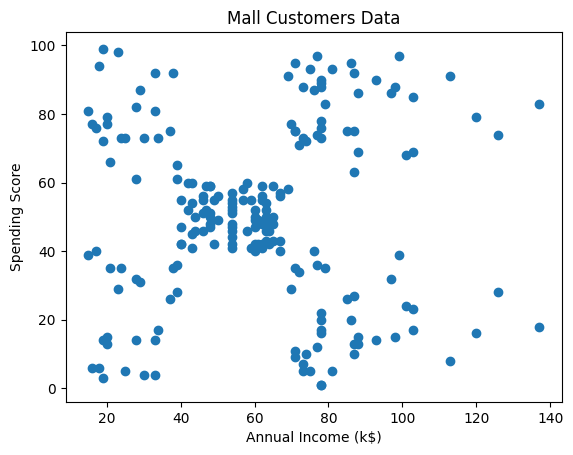

In [125]:
#Plot data points
plt.figure()
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Mall Customers Data')

Use columns corresponding to Annual Income and Spending Score to form the data array

In [126]:
#Create data array X
X = df.iloc[:, [3, 4]].values
print(X.shape)

(200, 2)


## K-means algorithm
Involves randomly initializing K cluster centroids and over a number of iterations:


*   Finding the closest cluster centroid for each data point and assigning it to belong to the corresponding cluster
*   Recomputing each new cluster centroid as the mean of all the data points belonging to that cluster

Here, the cost function (also known as distortion), is computed as:

Distortion = $\frac{1}{m} \sum_{i=1}^m||x^{(i)} - \mu_j||^2$

where
* m = number of data points
* $x^{(i)}$ = i$^{th}$ data point
* $\mu_j$ = cluster centroid closest to $x^{(i)}$
* $||x^{(i)} - \mu_j||$ = L2 norm



The algorithm, over a number of iterations, moves the cluster centroids to the centers of the clusters, effectively reducing the distortion and eventually converging.





Randomly initializing cluster centroids

In [127]:
def random_initialize(X, K):
  """
  Randomly initializes K cluster centroids

  Args:
  X (ndarray): (m, n) Input data
  K (int): number of clusters

  Returns:
  centroids (ndarray): (K, n) randomly initialized cluster centroids
  """
  #Randomly shuffle X along axis 0
  X_shuffle = np.random.permutation(X)
  #Select first K data points as cluster centroids
  centroids = X_shuffle[:K]

  return centroids

Finding closest centroid to a data point and assigning the data point to that cluster

In [128]:
def find_closest_centroid(X, centroids):
  """
  Finds the closest centroid for each example

  Args:
  X (ndarray): (m, n) Input data
  centroids (ndarray): (K, n) centroids of K clusters

  Returns:
  c_idx (ndarray): (m, ) closest centroid index for each example
  """
  #Number of examples, dimension of each example
  m, n = X.shape
  #Number of clusters
  K = centroids.shape[0]
  #Initialize centroid index array
  c_idx = np.zeros(m)

  #For each data example
  for i in range(m):
    #Squared l2 norm of the data example wrt each centroid
    distance = [np.linalg.norm(X[i] - centroids[j]) for j in range(K)]
    #Closest centroid index
    c_idx[i] = np.argmin(distance)

  return c_idx

Recomputing the cluster centroids as the average of the data points associated with the cluster


In [129]:
def compute_centroids(X, c_idx, K):
  """
  Calculates the new centroids of the K clusters

  Args:
  X (ndarray): (m,n) Input data
  c_idx(ndarray): (m, ) old centroid index for each example
  K (int): number of clusters

  Returns:
  centroids (ndarray): (K, n) new centroids for the K clusters
  """

  #Initialize centroids array
  centroids = np.zeros((K, X.shape[1]))
  #For each cluster
  for k in range(K):
    #Data examples assigned to the cluster
    X_k = X[c_idx == k]
    #Compute new centroid as the mean of examples
    centroids[k] = np.mean(X_k, axis = 0)

  return centroids

Computing the cost function - distortion

In [130]:
def compute_distortion(X, centroids, c_idx):
  """
  Computes the distortion (cost function) of clustering

  Args:
  X (ndarray): (m,n) Input data
  centroids (ndarray): (K, n) cluster centroids
  c_idx (ndarray): (m, ) closest centroid index for each example

  Returns:
  distortion (float): Cost function of clustering
  """
  #Initialize distortion
  distortion = 0
  m = X.shape[0]
  #For each cluster
  for k in range(centroids.shape[0]):
    #Data examples belonging to cluster
    X_cluster = X[c_idx == k]
    #Compute squared l2 norm of examples wrt cluster centroid
    dist = [(np.linalg.norm(X_cluster[i] - centroids[k]))**2 for i in range(X_cluster.shape[0])]
    #Add to distortion
    distortion += sum(dist)
  #Average distortion over m examples
  distortion/= m

  return distortion


Performing K-means clustering with one random initialization of cluster centroids

In [131]:
def run_Kmeans(X, centroids_initial, max_iters = 10, output_progress = False, plot_distortion = False, plot_progress = False):
  """
  Performs K-means clustering

  Args:
  X (ndarray): (m, n) Input data
  centroids_initial (ndarray): (K, n) randomly initialized centroids for K clusters
  max_iters (int): number of iterations

  Returns:
  centroids (ndarray): (K, n) centroids of the clusters
  c_idx (ndarray): (m, ) centroid index for each data example
  distortion (float): cost function of clustering
  """

  #Initialize
  centroids = centroids_initial
  K = centroids.shape[0]
  distortion = np.zeros(max_iters)
  centroids_previous = np.zeros((K, X.shape[1], max_iters))

  for i in range(max_iters):

    #Optional, Output progress
    if output_progress:
      print(f"Iteration {i+1}/{max_iters}")
    #Find closest centroid for each data example
    c_idx = find_closest_centroid(X, centroids)
    #Compute distortion
    distortion[i] = compute_distortion(X, centroids, c_idx)
    #Recompute centroids
    centroids_previous[:, :, i] = centroids
    centroids = compute_centroids(X, c_idx, K)

  #Optional, Plot progress
  if plot_progress:
    plt.figure(1)
    colors = ['y', 'g', 'b', 'c', 'm']
    for k in range(centroids.shape[0]):
      plt.scatter(X[c_idx == k, 0], X[c_idx == k, 1], color = colors[k], label = 'Cluster'+str(k+1))
    plt.scatter(centroids_previous[:, 0, 0], centroids_previous[:, 1, 0], marker = 'x', color = 'k', label = 'Initial Centroid')
    for k in range(centroids.shape[0]):
      plt.plot(centroids_previous[k, 0, :], centroids_previous[k, 1, :], color = 'k', linestyle = '--')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = 'r', label = 'Final Centroid')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score')
    plt.legend(loc = 'upper right')
    plt.title('Mall Customers Data - Clustered')


  #Optional, Plot distortion
  if plot_distortion:
    plt.figure(2)
    plt.plot(np.arange(1, len(distortion)+1), distortion, color = 'b')
    plt.xlabel('Iterations')
    plt.ylabel('Distortion')
    plt.title('Cost Function for K-Means Clustering')


  return centroids, c_idx, distortion[-1]




Running K-means clustering by choosing 5 clusters

Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10


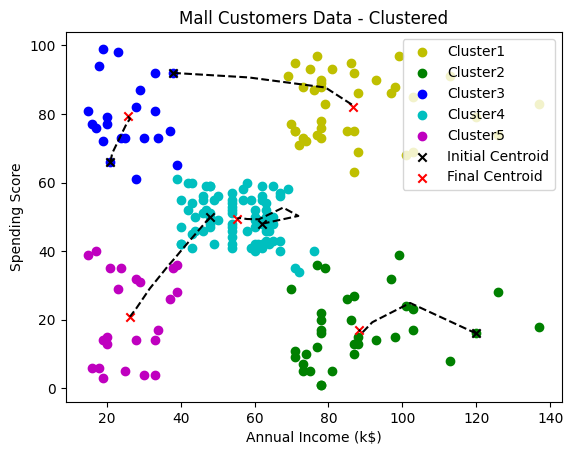

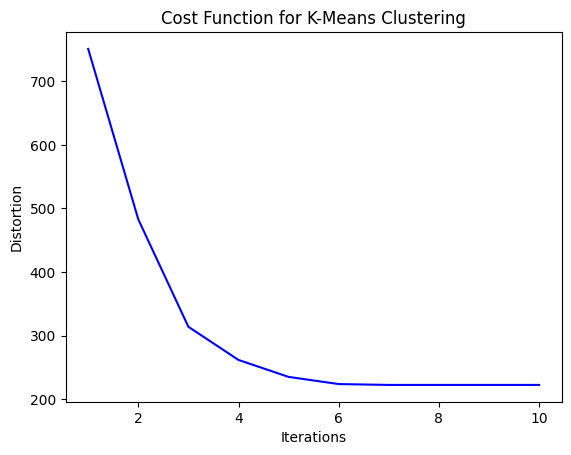

In [132]:
#Choosing 5 clusters by simply viewing the data
K = 5
#Randomly initialize centroids
centroids_initial = random_initialize(X, K)
#Run K-means
centroids, c_idx, distortion = run_Kmeans(X, centroids_initial, output_progress = True, plot_distortion = True, plot_progress = True)


## Optimized K-means Clustering
Since the choice of initial cluster centroids may affect the final clusters formed, we perform multiple random initializations for cluster centroids and select the clustering that results in minimum distortion

In [133]:
def optimized_Kmeans(X, K, RI = 50):
  """
  Performs multiple random initializations for cluster centroids and chooses the optimal clustering with lowest distortion

  Args:
  X (ndarray): (m, n) Input Data
  K (int): number of clusters
  RI (int): number of random initializations for cluster centroids

  Returns:
  centroids_best (ndarray): (K, n) optimal cluster centroids
  c_idx_best (ndarray): (m, ) cluster index of each data example

  """
  #Initialize variables
  min_distortion = float('inf')
  #For each iteration of random initialization
  for i in range(RI):
    #Randomly initialize centroids
    centroids_initial = random_initialize(X, K)
    #Run K-means
    centroids, c_idx, distortion = run_Kmeans(X, centroids_initial)
    #Choose cluster centroids with lowest distortion
    if distortion < min_distortion:
      centroids_best = centroids
      c_idx_best = c_idx
      min_distortion = distortion


  return centroids_best, c_idx_best, min_distortion


In [134]:
centroids, c_idx, distortion = optimized_Kmeans(X, K=5)


Plotting optimally clustered data

Text(0.5, 1.0, 'Mall Customers Data - Clustered')

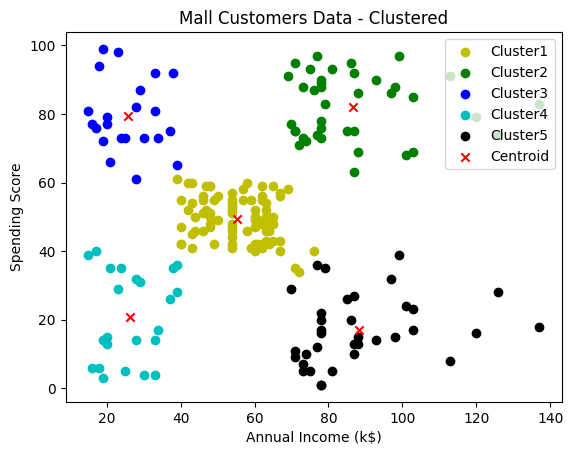

In [135]:
plt.figure()
colors = ['y', 'g', 'b', 'c', 'k']
for k in range(centroids.shape[0]):
  plt.scatter(X[c_idx == k, 0], X[c_idx == k, 1], color = colors[k], label = 'Cluster'+str(k+1))
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = 'r', label = 'Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(loc = 'upper right')
plt.title('Mall Customers Data - Clustered')

## Choosing number of clusters
One method to decide on the number of clusters formed, K,  is the Elbow Method. Here, we perform the K-means clustering for different values of K and plot the distortion versus K. If the plot takes on the shape of a bent arm, the value of K coinciding with the 'elbow' in the arm would represent an optimal choice for K.

Note: This method may not always work. An alternative method is to choose K based on the performance of some downstream objective.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


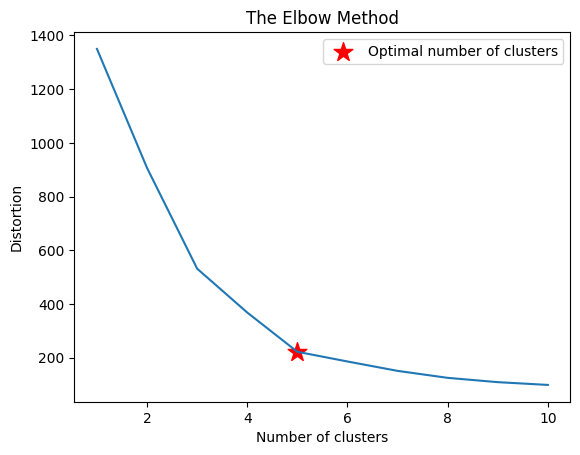

In [136]:
#Initialize variables
#Max number of clusters
K_max = 10
#Distortion array
distortion_array = np.zeros(K_max)

for K in range(K_max):
  centroids, c_idx, distortion = optimized_Kmeans(X, K+1)
  distortion_array[K] = distortion
#Plot of distortion vs number of clusters
plt.figure()
plt.plot(np.arange(1, K_max+1), distortion_array)
plt.scatter(5, distortion_array[4], color = 'r', marker = '*', s = 200, label = 'Optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.legend(loc = 'upper right')